In [2]:
from datetime import datetime, timezone
import os
from pathlib import Path
import sys

from dotenv import load_dotenv, find_dotenv
import pandas as pd
import pytz

In [3]:
# paths to common data locations - NOTE: to convert any path to a raw string, simply use str(path_instance)
dir_prj = Path.cwd().parent

dir_data = dir_prj/'data'

dir_raw = dir_data/'raw'
dir_ext = dir_data/'external'
dir_int = dir_data/'interim'
dir_out = dir_data/'processed'

gdb_raw = dir_raw/'raw.gdb'
gdb_int = dir_int/'interim.gdb'
gdb_out = dir_out/'processed.gdb'

# import the project package from the project package path - only necessary if you are not using a unique environemnt for this project
sys.path.append(str(dir_prj/'src'))
import river_levels

# load the "autoreload" extension so that code can change, & always reload modules so that as you change code in src, it gets loaded
%load_ext autoreload
%autoreload 2

# load environment variables from .env
load_dotenv(find_dotenv())

True

In [4]:
from river_levels import Gauge

In [187]:
gauge, min_flow, max_flow, metric = Gauge('14226500', 'usgs'), 800, 1700, 'cfs'  # queets
gauge, min_flow, max_flow, metric = Gauge('14123500', 'usgs'), 600, 1800, 'cfs'  # white salmon
gauge, min_flow, max_flow, metric = Gauge('12134500', 'usgs'), 700, 20000, 'cfs' # skykomish
gauge, min_flow, max_flow, metric = Gauge('12161000', 'usgs'), 5.0, 7.0, 'height'  # robe
gauge, min_flow, max_flow, metric = Gauge('07055875', 'usgs'), 3.0, 6.0, 'height'  # richland
gauge, min_flow, max_flow, metric = Gauge('07055646', 'usgs'), 7.0, 11.0, 'height'  # hailstone
gauge, min_flow, max_flow, metric = Gauge('12060500', 'usgs'), 650, 1600, 'cfs'  # sf skookomish 
gauge, min_flow, max_flow, metric = Gauge('12080010', 'usgs'), 200, 1500, 'cfs'  # deschutes oly

In [201]:
mean_df = gauge.get_rolling_mean(metric=metric, min=min_flow, max=max_flow)

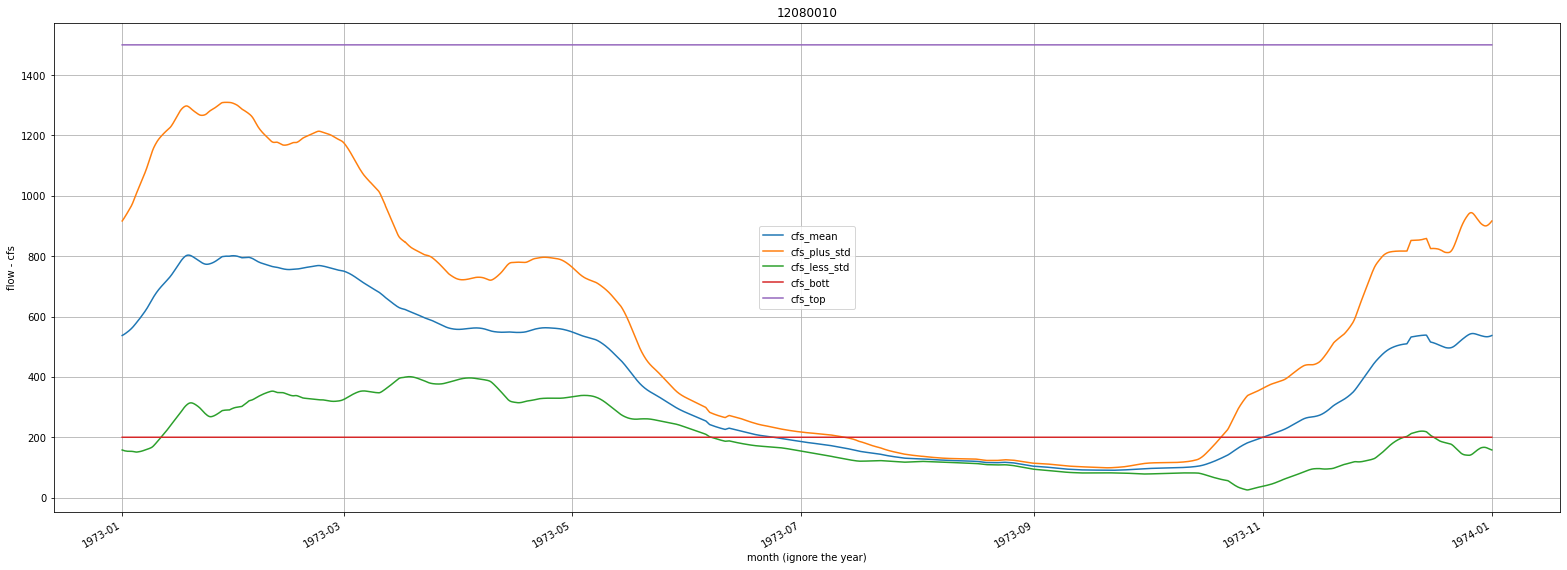

In [203]:
_ = mean_df.plot(figsize=(27,10), title=gauge.id, xlabel='month (ignore the year)', ylabel=f'flow - {metric}', grid=True)